In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import joblib
from tkinter import *
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
df.shape

(200, 5)

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
#Univariant Analysis

In [10]:
value_count_income = df['Annual Income (k$)'].value_counts()
value_count_income.sort_index(inplace=True)
value_count_income

Annual Income (k$)
15     2
16     2
17     2
18     2
19     4
      ..
103    4
113    2
120    2
126    2
137    2
Name: count, Length: 64, dtype: int64

<Figure size 640x480 with 0 Axes>

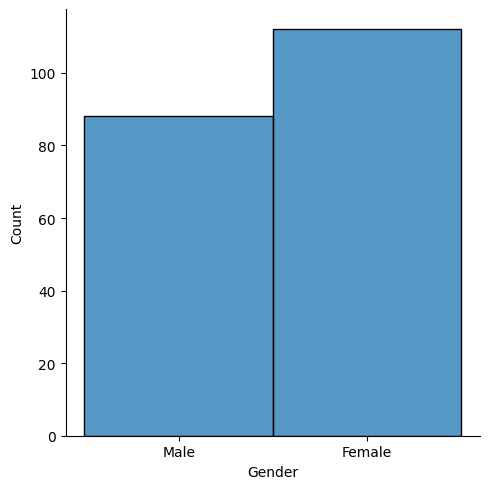

<Figure size 640x480 with 0 Axes>

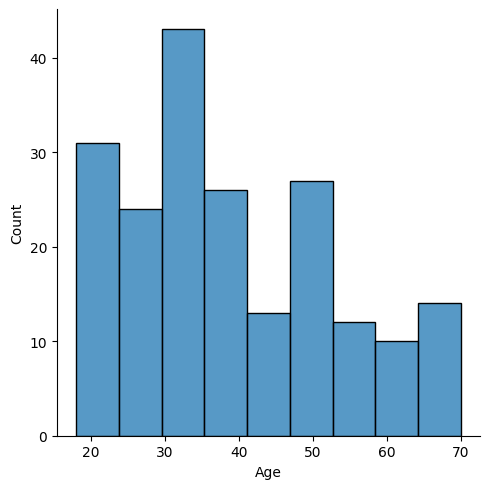

<Figure size 640x480 with 0 Axes>

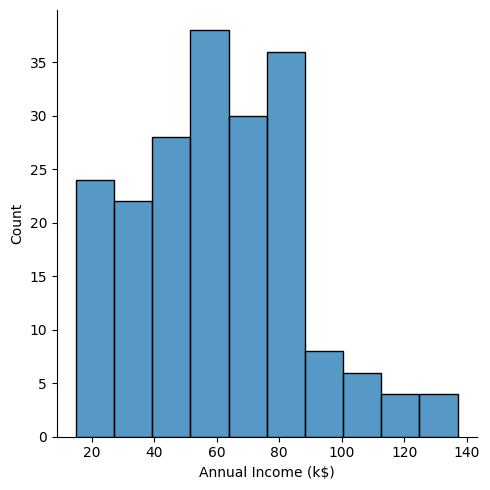

<Figure size 640x480 with 0 Axes>

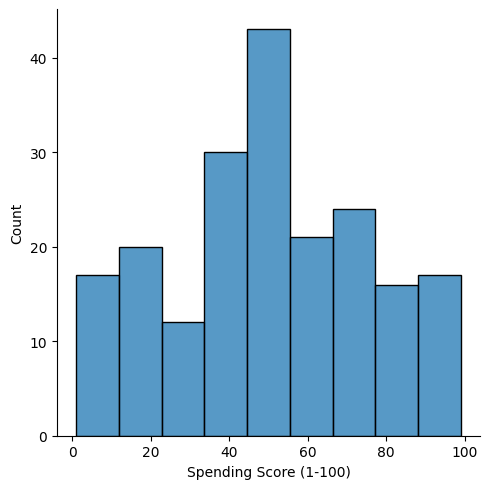

In [11]:
columns = ['Gender','Age','Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.displot(x=df[i])

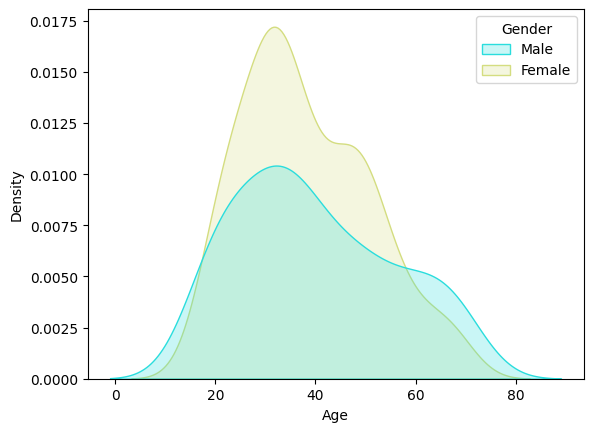

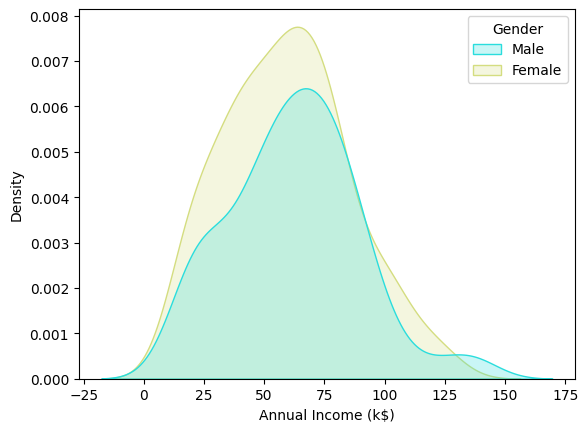

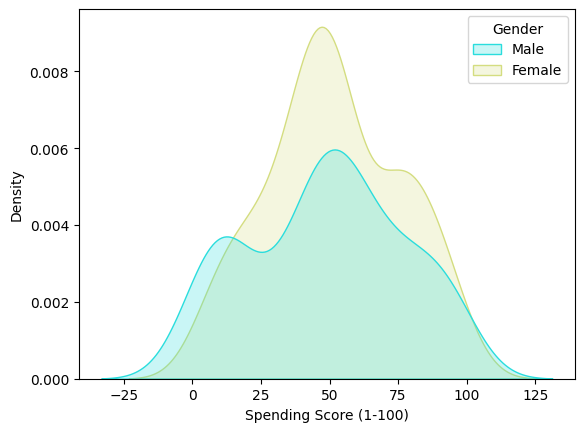

In [12]:
columns = ['Age','Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(x=df[i],hue=df['Gender'],palette='rainbow',fill=True)

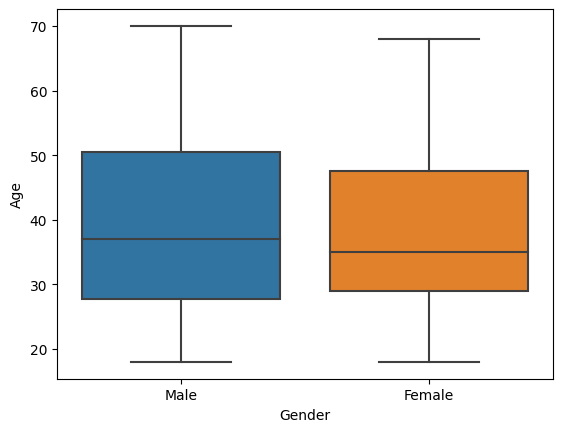

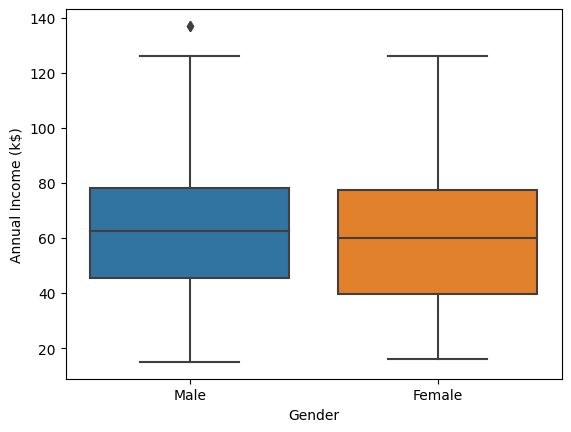

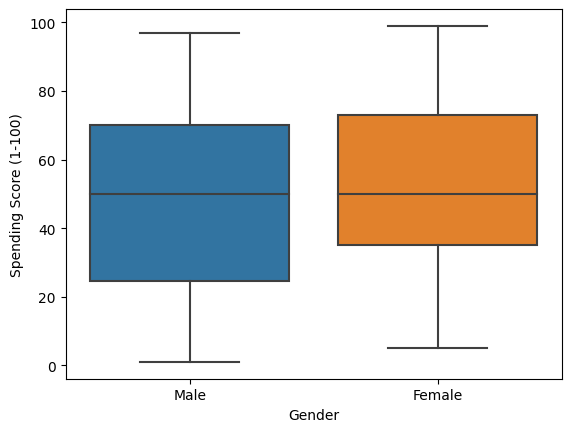

In [13]:
for i in columns:
    plt.figure()
    sns.boxplot(x=df['Gender'],y=df[i],data=df)

In [14]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [15]:
#Bivariant Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

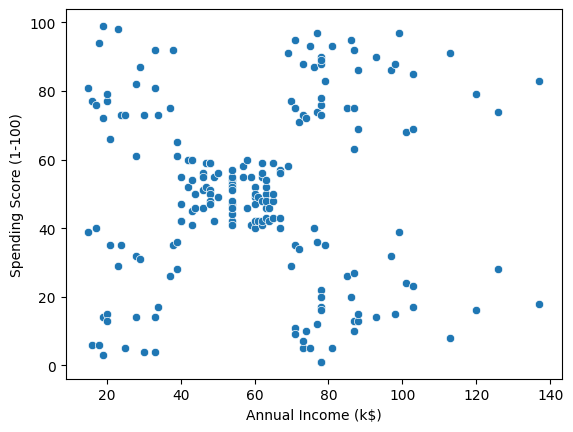

In [16]:
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],data=df)

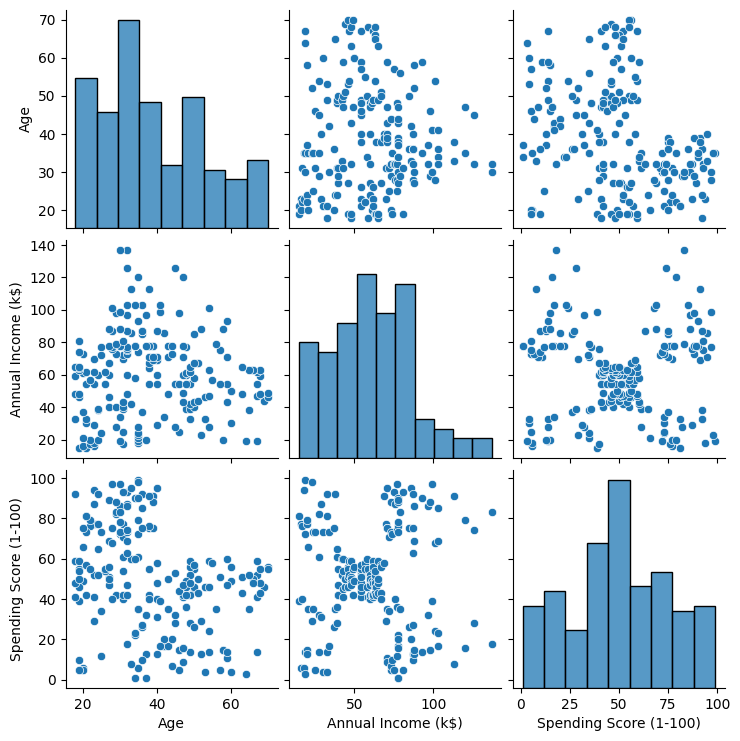

In [17]:
df=df.drop(columns='CustomerID')
sns.pairplot(df)

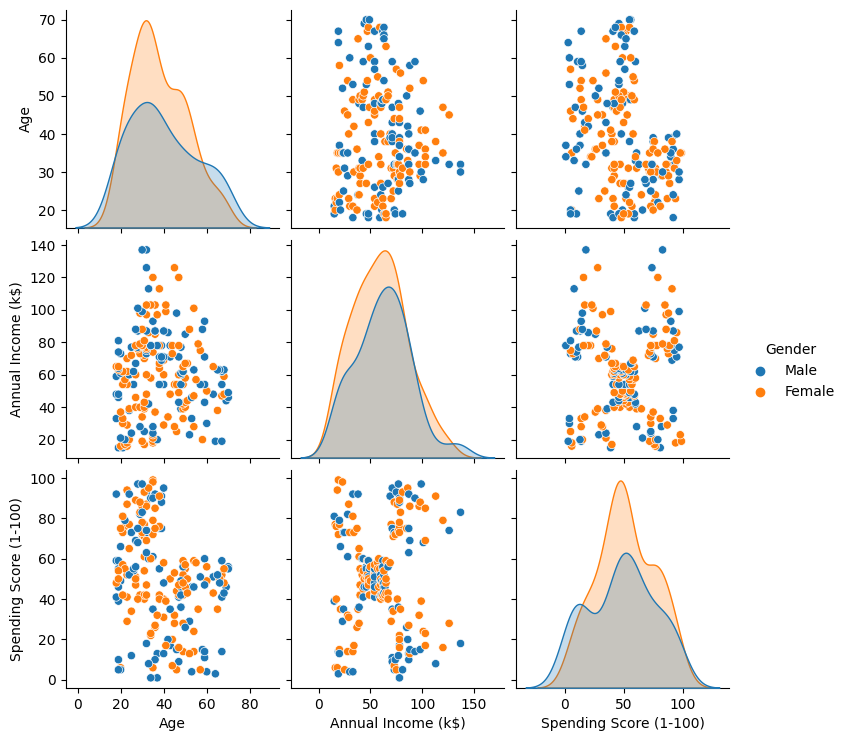

In [18]:
sns.pairplot(df,hue='Gender')

In [19]:
df.groupby(['Gender'])[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [20]:
df['Gender']=df['Gender'].astype('category')
df['Gender']=df['Gender'].cat.codes


In [21]:
corr = df.corr()
corr

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),-0.058109,-0.327227,0.009903,1.000000


<Axes: >

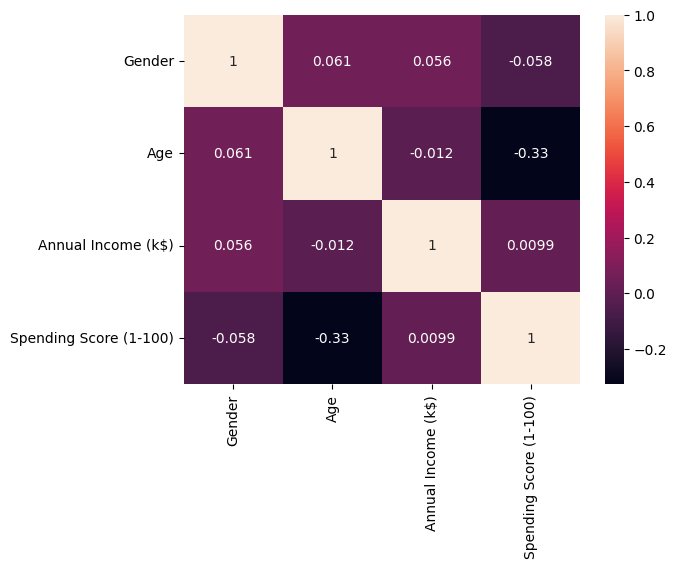

In [22]:
sns.heatmap(corr,annot=True)

In [23]:
#Clustering - Univariant,Bivariant,Multivariant

In [24]:
x = df[['Annual Income (k$)','Spending Score (1-100)']]

In [25]:
k_means = KMeans()
k_means.fit(x)

KMeans()

In [26]:
k_means.fit_predict(x)

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3, 0, 3, 3,
       4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 7, 6, 7, 5, 7, 5, 7,
       6, 7, 5, 7, 5, 7, 5, 7, 5, 7, 6, 7, 5, 7, 6, 7, 5, 7, 5, 7, 5, 7,
       5, 7, 5, 7, 5, 7, 6, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7,
       5, 7, 5, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [27]:
#with in cluster square of sum matric value
wcss = [] 
for i in range(1,11):
    k_means=KMeans(n_clusters = i)
    k_means.fit(x)
    wcss.append(k_means.inertia_)

In [28]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37265.86520484347,
 30273.394312070042,
 25028.02047526941,
 22155.149490364707,
 19705.950272915492]

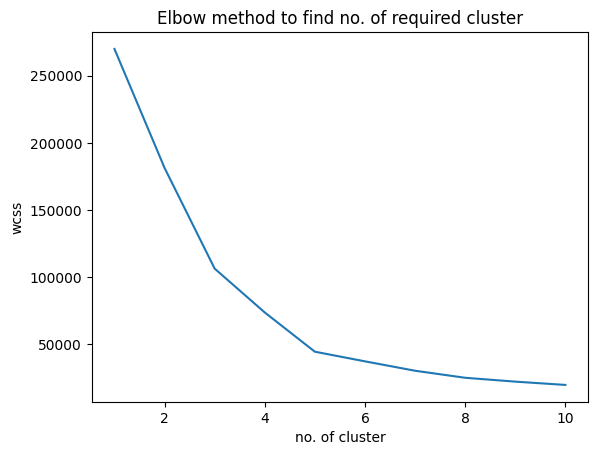

In [29]:
plt.plot(range(1,11),wcss)
plt.title('Elbow method to find no. of required cluster')
plt.xlabel('no. of cluster')
plt.ylabel('wcss')
plt.show()

In [30]:
#from above number of cluster we can take is 5

In [31]:
k_means = KMeans(n_clusters=5,random_state=42)
y_mean=k_means.fit_predict(x)
y_mean

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

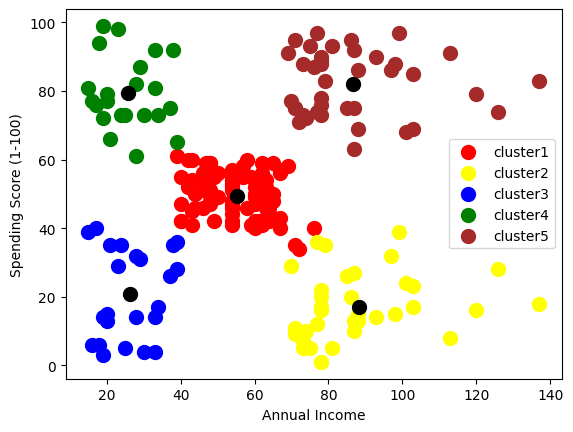

In [32]:
plt.scatter(x.iloc[y_mean==0,0],x.iloc[y_mean==0,1],s=100,c='red',label='cluster1')
plt.scatter(x.iloc[y_mean==1,0],x.iloc[y_mean==1,1],s=100,c='yellow',label='cluster2')
plt.scatter(x.iloc[y_mean==2,0],x.iloc[y_mean==2,1],s=100,c='blue',label='cluster3')
plt.scatter(x.iloc[y_mean==3,0],x.iloc[y_mean==3,1],s=100,c='green',label='cluster4')
plt.scatter(x.iloc[y_mean==4,0],x.iloc[y_mean==4,1],s=100,c='brown',label='cluster5')
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=100,c="black")
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()

In [33]:
joblib.dump(k_means,'customer_segmentation')

['customer_segmentation']

In [34]:
model = joblib.load('customer_segmentation')

In [35]:
model.predict([[45,200]])

array([3])

In [36]:
y = df[['Age','Spending Score (1-100)']]

In [41]:
wcss1 = []
for i in range(1,11):
    k_means1 = KMeans(n_clusters=i)
    k_means1.fit(y)
    wcss1.append(k_means1.inertia_)

In [42]:
wcss1

[171535.5,
 75949.15601023017,
 45840.67661610868,
 28165.583566629342,
 23819.442236543742,
 19489.64388446867,
 15523.684014328752,
 13024.350726326813,
 11515.134119508413,
 10571.703800505049]

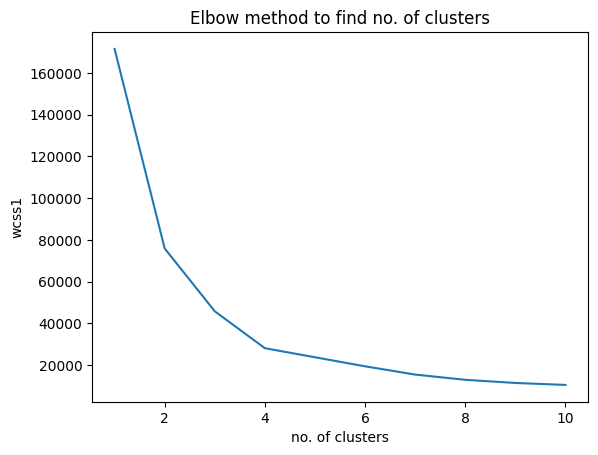

In [43]:
plt.plot(range(1,11),wcss1)
plt.title('Elbow method to find no. of clusters')
plt.xlabel('no. of clusters')
plt.ylabel('wcss1')
plt.show()

In [40]:
#from above number of cluster we can take is 5

In [44]:
k_means1 = KMeans(n_clusters=5,random_state=42)
y_mean1=k_means1.fit_predict(y)

In [45]:
y_mean1

array([3, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 3, 1, 2, 1, 2,
       4, 2, 4, 2, 1, 3, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 0, 2, 1, 3,
       1, 3, 0, 3, 3, 1, 0, 3, 3, 0, 0, 1, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       1, 0, 3, 3, 0, 1, 0, 0, 0, 3, 0, 1, 3, 1, 0, 3, 0, 1, 3, 1, 0, 3,
       3, 0, 0, 3, 0, 1, 1, 3, 1, 3, 1, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 1, 3, 3, 3, 0, 0, 0, 0, 3, 1, 3, 2, 1, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 3, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 1, 2, 4, 2, 1, 3, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2,
       4, 2])

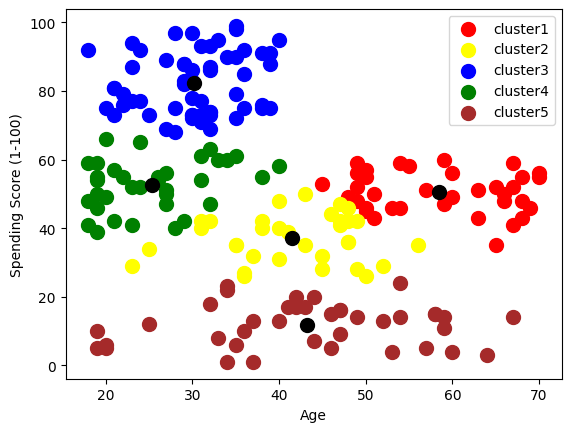

In [47]:
plt.scatter(y.iloc[y_mean1==0,0],y.iloc[y_mean1==0,1],s=100,c='red',label='cluster1')
plt.scatter(y.iloc[y_mean1==1,0],y.iloc[y_mean1==1,1],s=100,c='yellow',label='cluster2')
plt.scatter(y.iloc[y_mean1==2,0],y.iloc[y_mean1==2,1],s=100,c='blue',label='cluster3')
plt.scatter(y.iloc[y_mean1==3,0],y.iloc[y_mean1==3,1],s=100,c='green',label='cluster4')
plt.scatter(y.iloc[y_mean1==4,0],y.iloc[y_mean1==4,1],s=100,c='brown',label='cluster5')
plt.scatter(k_means1.cluster_centers_[:,0],k_means1.cluster_centers_[:,1],s=100,c="black")
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()